In [2]:
#import all modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as td
from datetime import timedelta

from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

In [5]:
#data
data = pd.read_csv('C:/Users/hp/Downloads/train.csv')

In [4]:
data.head()

,Gender,Age,Marital Status,Education,Total assets,Total Land Owned,Alcohol/tobacco,Social expenses,Total expenses,Medical Expenses,Early_survey,depressed
0,1,28.0,1,10,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0
1,1,23.0,1,8,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,1
2,1,22.0,1,9,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0
3,1,27.0,1,10,797.330822,0.0,0.0,39.771500,17.890503,0.000000,0,0
4,0,59.0,0,10,201.005614,0.5,0.0,8.087762,2.073101,1.233183,0,0


In [7]:
data.shape

(1143, 12)

In [8]:
#descriptive statistics
data.describe()

,Gender,Age,Marital Status,Education,Total assets,Total Land Owned,Alcohol/tobacco,Social expenses,Total expenses,Medical Expenses,Early_survey,depressed
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.916885,34.537270,0.772528,8.735783,292.185802,0.926868,1.757108,3.647826,21.414848,5.850174,0.097988,0.168854
std,0.276176,13.742107,0.419383,2.867202,389.069954,1.663766,8.318950,7.574917,101.386778,20.888288,0.297428,0.374787
min,0.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,24.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,30.000000,1.000000,9.000000,194.983339,0.000000,0.000000,1.281230,1.240079,0.603246,0.000000,0.000000
75%,1.000000,41.000000,1.000000,10.000000,413.379925,1.500000,0.000000,3.816996,10.218695,4.644457,0.000000,0.000000
max,1.000000,91.000000,1.000000,19.000000,4456.308539,27.000000,146.540632,140.134490,2067.584200,489.322947,1.000000,1.000000


In [302]:
#check for null values
data.isnull().sum()

Gender              0
Age                 0
Marital Status      0
Education           0
Total assets        0
Total Land Owned    0
Alcohol/tobacco     0
Social expenses     0
Total expenses      0
Medical Expenses    0
Early_survey        0
depressed           0
dtype: int64

#### VISUALISATIONS

<AxesSubplot:xlabel='depressed', ylabel='count'>

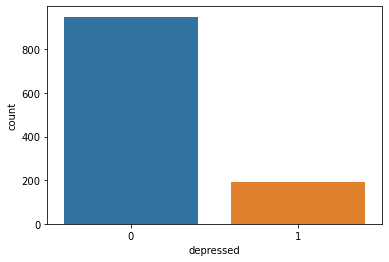

In [303]:
#checking for data imbalance in target column
sns.countplot(x='depressed', data=data) # data is imbalanced

Text(0.5, 1.0, 'Marital Status vs Depressed')

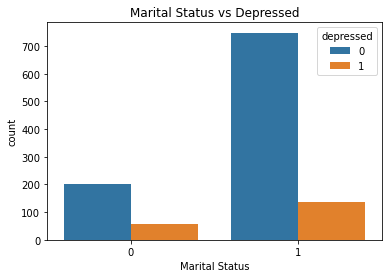

In [317]:
#Marital status and depression status
sns.countplot(x='Marital Status', hue='depressed', data=data)
plt.title('Marital Status vs Depressed')

In [ ]:
data['Marital Status']

Text(0.5, 1.0, 'Gender vs Depressed')

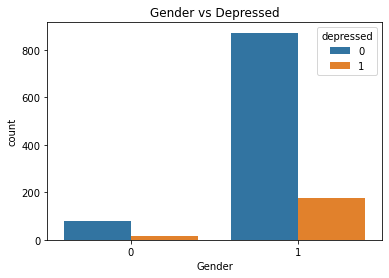

In [318]:
#Gender status and depression status
sns.countplot(x='Gender', hue='depressed', data=data)
plt.title('Gender vs Depressed')

Text(0.5, 1.0, 'Early Survey vs Depressed')

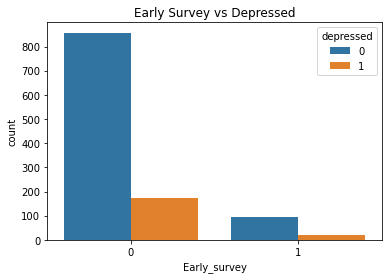

In [319]:
#Early Survey and depression status
sns.countplot(x='Early_survey', hue='depressed', data=data)
plt.title('Early Survey vs Depressed')

In [312]:
def outliers(data, feature):
    Q1= data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(data,['Education'])
                              
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  Education    13.0
dtype: float64
Lower Whisker:  Education    5.0
dtype: float64


Text(0.5, 1.0, 'Age vs Depressed')

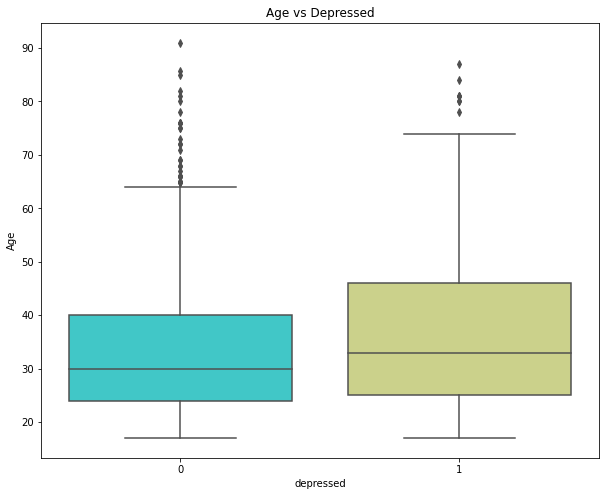

In [313]:
#Age vs depressed
plt.figure(figsize=(10,8))

sns.boxplot(x='depressed',y='Age',data=data,palette = 'rainbow')
plt.title('Age vs Depressed')

Text(0.5, 1.0, 'Education level vs Depressed')

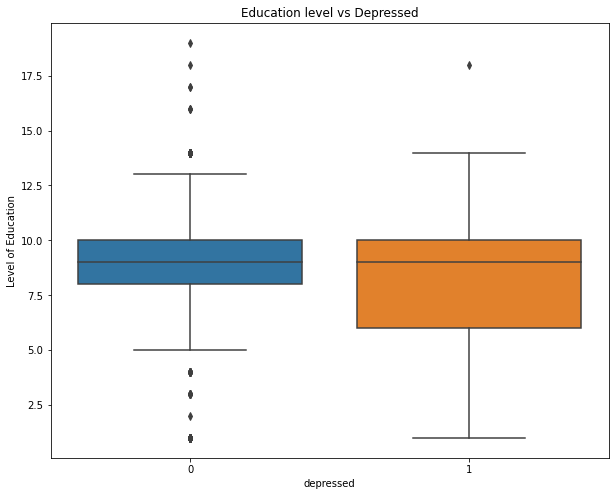

In [109]:
#Assets vs depressed
plt.figure(figsize=(10,8))

sns.boxplot(x='depressed',y='edu',data=data)
plt.ylabel('Level of Education')
plt.title('Education level vs Depressed')

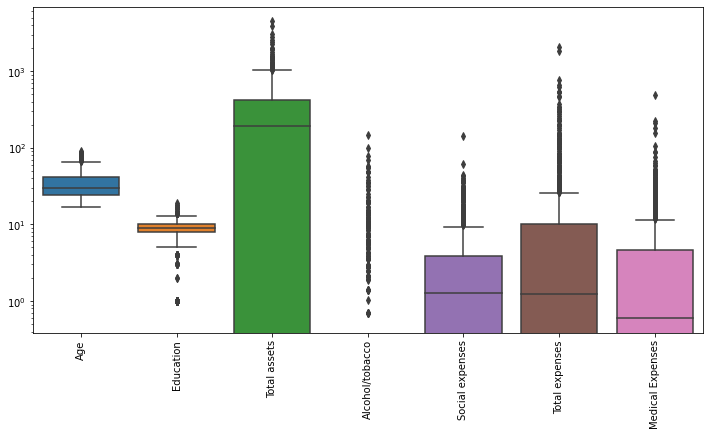

In [311]:
#Outliers
plt.figure(figsize=(12,6))
df = data[['Age','Education','Total assets','Alcohol/tobacco','Social expenses','Total expenses','Medical Expenses']]
sns.boxplot(data=df)
plt.yscale('log')

plt.xticks(rotation=90)
plt.show()


In [ ]:
#remove outliers
def cap_data(data):
    for col in data.columns:
        print("capping the ",col)
        if (((data[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = data[col].quantile([0.01,0.99]).values
            data[col][data[col] <= percentiles[0]] = percentiles[0]
            data[col][data[col] >= percentiles[1]] = percentiles[1]
        else:
            data[col]=data[col]
    return data

final_df=cap_data(data)

In [234]:
#Split data into labels(X) and target(Y)
X = data.drop(columns=['depressed'],axis=1)
Y = data['depressed']

#### FEATURE SELECTION

Use Pearson's Correlation Method

Check for correlation between the independent variables

Where variables have a 70% or more correlation, only retain one of the variables

No variables were found to have a correlation >= 0.7



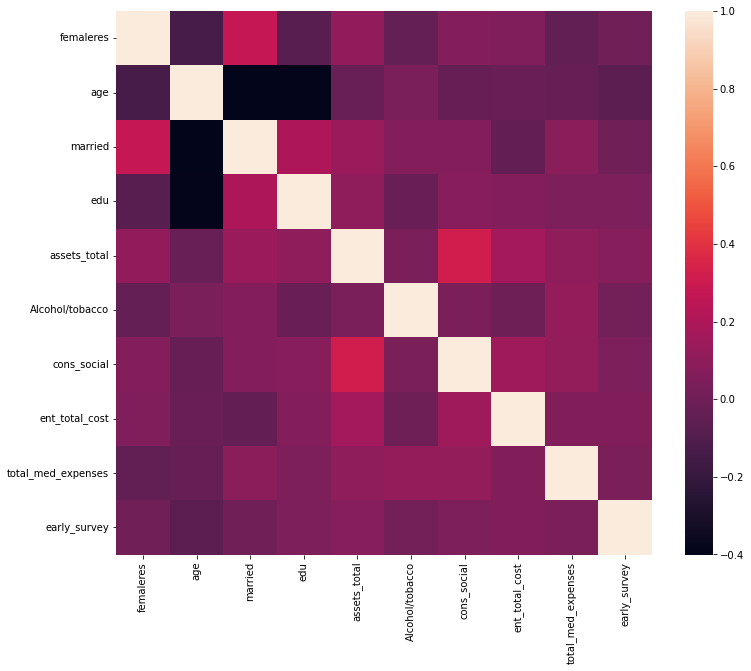

In [235]:
# checking correlation between variables
plt.figure(figsize=(12,10))

cor = X.corr()
sns.heatmap(cor)

plt.show()

In [236]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]# get the name of the column
                col_corr.add(colname)
    return col_corr


In [237]:
corr_features = correlation(data,0.7)
len(set(corr_features))

0

#### Recursive Feature Estimator
Select 7 features

In [242]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
# Init the transformer
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=7)

# Fit to the data
_ = rfe.fit(X, Y)

In [243]:
print(X.columns[rfe.support_])

Index(['age', 'edu', 'assets_total', 'Alcohol/tobacco', 'cons_social',
       'ent_total_cost', 'total_med_expenses'],
      dtype='object')


In [244]:
f = rfe.get_support(1)
f
new_df = data[data.columns[f]]
new_df

,age,edu,assets_total,Alcohol/tobacco,cons_social,ent_total_cost,total_med_expenses
0,28.0,10,0.000000,0.000000,0.000000,0.000000,0.000000
1,23.0,8,0.000000,0.000000,0.000000,0.000000,0.000000
2,22.0,9,0.000000,0.000000,0.000000,0.000000,0.000000
3,27.0,10,797.330822,0.000000,39.771500,17.890503,0.000000
4,59.0,10,201.005614,0.000000,8.087762,2.073101,1.233183
...,...,...,...,...,...,...,...
1138,36.0,9,0.000000,0.000000,0.000000,0.000000,0.000000
1139,23.0,10,343.782634,25.121251,2.522421,0.000000,4.003842
1140,28.0,10,592.020877,0.000000,10.676913,72.936661,0.000000
1141,33.0,9,0.000000,0.000000,0.000000,0.000000,0.000000


In [247]:
X1 = new_df

#### TRAIN,TEST,SPLIT

In [248]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y,test_size=0.2,stratify=Y,random_state=2)

In [249]:
print(X.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1143, 10) (914, 7) (229, 7) (914,) (229,)


#### MODELLING
Done in two phases:

a) SVM and KNN With imbalanced data 
 
b) SVM,KNN, Logistic Regression & Naive Bayes, after balancing data using SMOTE

Comparison of the confusion matrices and classification report from both phases is then carried out

Expectations: Better scores with balanced data


#### PHASE 1

#### SUPPORT VECTOR MACHINE

In [250]:
#Support Vector Machine Model
classifier = svm.SVC(kernel='linear')

In [251]:
#training the svm model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [252]:
#model evaluation
#accuracy of >75 is good
#accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on the training data:',training_data_accuracy)

Accuracy on the training data: 0.8315098468271335


In [253]:
#accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on the test data:',test_data_accuracy)

Accuracy on the test data: 0.8296943231441049


In [257]:
X_test_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Confusion Matrix

In [326]:
confusion_matrix1 = confusion_matrix(Y_test, X_test_prediction)
print(confusion_matrix1)


[[190   0]
 [ 39   0]]


Precision, Recall, FMeasure and Support

In [285]:
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       190
           1       0.00      0.00      0.00        39

    accuracy                           0.83       229
   macro avg       0.41      0.50      0.45       229
weighted avg       0.69      0.83      0.75       229



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### K-NEAREST NEIGHBOUR

In [259]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [260]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [261]:
knn_pred = knn_model.predict(X_test)
# Review the predictions
knn_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

Confusion Matrix

In [336]:
confusion_matrix = confusion_matrix(Y_test, knn_pred)
print(confusion_matrix)

[[168  22]
 [ 34   5]]


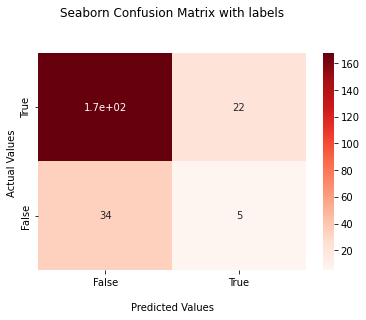

In [339]:
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Reds')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Precision, Recall, FMeasure and Support

In [263]:
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       190
           1       0.19      0.13      0.15        39

    accuracy                           0.76       229
   macro avg       0.51      0.51      0.50       229
weighted avg       0.72      0.76      0.74       229



#### NAIVE BAYES

In [264]:
#fitting the model
naive_bayes_model = naive_bayes.BernoulliNB()
naive_bayes_model.fit(X_train, Y_train)

BernoulliNB()

In [265]:
#predicting
naive_bayes_pred = naive_bayes_model.predict(X_test)
naive_bayes_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [268]:
#confusion matrix
confusion_matrix3 = confusion_matrix(Y_test, naive_bayes_pred)
confusion_matrix3

array([[190,   0],
       [ 39,   0]], dtype=int64)

In [134]:
#Precision,Recall,F-measure and Support
print(classification_report(Y_test, naive_bayes_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       190
           1       0.00      0.00      0.00        39

    accuracy                           0.83       229
   macro avg       0.41      0.50      0.45       229
weighted avg       0.69      0.83      0.75       229



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### LOGISTIC REGRESSION

In [269]:
#fitting the model with data
log_reg = linear_model.LogisticRegression(C=1e40, solver='newton-cg')
log_model = log_reg.fit(X_train, Y_train)

In [270]:
#Predict
log_pred = log_model.predict(X_test)
log_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [271]:
#Confusion matrix
confusion_matrix4 = confusion_matrix(Y_test, log_pred)
confusion_matrix4

array([[189,   1],
       [ 39,   0]], dtype=int64)

In [272]:
#classification report
print(classification_report(Y_test, log_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       190
           1       0.00      0.00      0.00        39

    accuracy                           0.83       229
   macro avg       0.41      0.50      0.45       229
weighted avg       0.69      0.83      0.75       229



#### PHASE 2:HANDLING IMBALANCE; USING SMOTE METHOD


In [327]:
from imblearn.over_sampling import SMOTE

In [328]:
#resampling the data
#Only resample the training data
X_resampled, Y_resampled = SMOTE().fit_resample(X_train,Y_train)

#### Re-modelling with Balanced Data

#### KNN
We'll see the differences in the classification report and the confusion matrix when data has been balanced using SMOTE versus when data used is imbalanced

#### Fitting the Model with Resampled Data

In [329]:
knn_model.fit(X_resampled, Y_resampled)

KNeighborsClassifier(n_neighbors=1)

In [330]:
knn_predict = knn_model.predict(X_test)

In [331]:
knn_predict

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

 Confusion Matrix

In [332]:
confusion_matrix_resamp = confusion_matrix(Y_test, knn_predict)
print(confusion_matrix_resamp)

[[149  41]
 [ 29  10]]


Precision, Recall, FMeasure and Support

In [333]:
print(classification_report(Y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       190
           1       0.20      0.26      0.22        39

    accuracy                           0.69       229
   macro avg       0.52      0.52      0.52       229
weighted avg       0.73      0.69      0.71       229



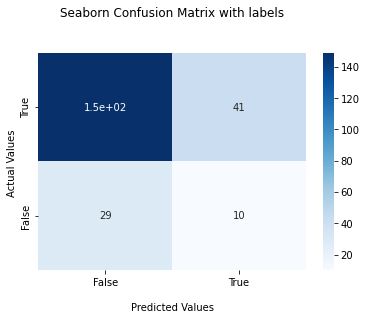

In [341]:
ax = sns.heatmap(confusion_matrix_resamp, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['True','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [345]:
from sklearn.metrics import plot_roc_curve

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


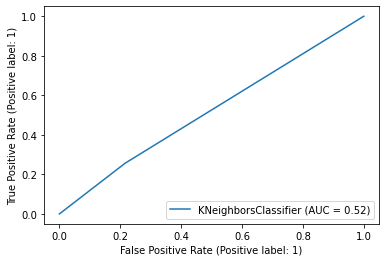

In [347]:
#ROC Curve for KNN

plot_roc_curve(knn_model, X_test, Y_test) 
plt.show()


#### SVM

In [281]:
#fit
classifier.fit(X_resampled, Y_resampled)

SVC(kernel='linear')

In [282]:
#predict
svm_pred = classifier.predict(X_test)

 Confusion Matrix

In [283]:
confusion_matrix2 = confusion_matrix(Y_test, svm_pred)
print(confusion_matrix2)

[[142  48]
 [ 25  14]]


Precision, Recall, FMeasure and Support

In [284]:
print(classification_report(Y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       190
           1       0.23      0.36      0.28        39

    accuracy                           0.68       229
   macro avg       0.54      0.55      0.54       229
weighted avg       0.74      0.68      0.71       229



#### NAIVE BAYES

In [125]:
from sklearn import naive_bayes

In [ ]:
#fitting the model
naive_bayes_model = naive_bayes.BernoulliNB()
naive_bayes_model.fit(X_resampled, Y_resampled)

In [ ]:
#predicting
naive_bayes_pred = naive_bayes_model.predict(X_test)
naive_bayes_pred

In [ ]:
#Accuracy Score
naive_bayes_model.score(X_resampled, Y_resampled)

In [ ]:
#confusion matrix
confusion_matrix3 = confusion_matrix(Y_test, naive_bayes_pred)
confusion_matrix3

In [ ]:
#Precision,Recall,F-measure and Support
print(classification_report(Y_test, naive_bayes_pred))

#### LOGISTIC REGRESSION

In [ ]:
#fitting the model with data
log_reg = linear_model.LogisticRegression(C=1e40, solver='newton-cg')
log_model = log_reg.fit(X_resampled, Y_resampled)

In [ ]:
#Predict
log_pred = log_model.predict(X_test)
log_pred

In [ ]:
#Confusion matrix
confusion_matrix4 = confusion_matrix(Y_test, log_pred)
confusion_matrix4

In [ ]:
#classification report
print(classification_report(Y_test, log_pred))